# Exoplanet_Detection

In [144]:
import pandas as pd
data = pd.read_csv('Kepler_Data.csv')
print(data.head()) #display the first few rows of the dataset

   rowid     kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2      3  10811496  K00753.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  ...  \
0      1.000              0              0              0  ...   
1      0.969              0              0              0  ...   
2      0.000              0              1              0  ...   
3      0.000              0              1              0  ...   
4      1.000              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0           -81.0      4.467           0.064    

In [145]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [146]:
print(data.isnull().sum())

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

In [147]:
print(data.columns)

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


In [148]:
unrelated_features = ['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 
                      'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_slogg', 
                       'koi_slogg_err1', 'koi_slogg_err2', 'koi_fpflag_ec',
                      'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_tce_delivname']
data = data.drop(unrelated_features, axis = 1)

In [149]:
data = data.dropna()

In [150]:
from sklearn import preprocessing 

In [151]:
le = preprocessing.LabelEncoder()

In [152]:
data['koi_pdisposition'] = le.fit_transform(data['koi_pdisposition'])

In [153]:
data_features = data.drop(['koi_pdisposition'], axis = 1)

In [154]:
data_features.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1.000,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,1.0,5455.0,81.0,-81.0,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0.969,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,2.0,5455.0,81.0,-81.0,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0.000,0,1,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,1.0,5853.0,158.0,-176.0,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0.000,0,1,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,1.0,5805.0,157.0,-174.0,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1.000,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,1.0,6031.0,169.0,-211.0,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [155]:
print(data_features.columns)

Index(['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')


In [156]:
data_target = data[['koi_pdisposition']]

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()

In [159]:
data_features[['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']] = scaler.fit_transform(data_features[['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']])

In [160]:
print(data_features.head())

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_period  \
0   1.065683      -0.360171      -0.598716       -0.52361   -0.320503   
1   1.000701      -0.360171      -0.598716       -0.52361    0.197005   
2  -1.030526      -0.360171       1.670241       -0.52361   -0.200588   
3  -1.030526      -0.360171       1.670241       -0.52361   -0.409780   
4   1.065683      -0.360171      -0.598716       -0.52361   -0.400697   

   koi_period_err1  koi_period_err2  koi_time0bk  koi_time0bk_err1  \
0        -0.183453         0.183453     0.218721         -0.264257   
1        -0.139571         0.139571     0.080093         -0.197742   
2        -0.186006         0.186006     0.310475         -0.341483   
3        -0.188931         0.188931     0.214727         -0.364274   
4        -0.188234         0.188234     0.236977         -0.314633   

   koi_time0bk_err2  ...  koi_tce_plnt_num  koi_steff  koi_steff_err1  \
0          0.264257  ...         -0.370317  -0.297055       -1.2781

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test= train_test_split(data_features, data_target, test_size = 0.2, random_state = 42)

In [163]:
print("Training set size", X_train.shape)
print("Testing Set size", X_test.shape)

Training set size (6242, 33)
Testing Set size (1561, 33)


In [250]:
from sklearn.linear_model import LogisticRegression

In [251]:
model = LogisticRegression()

In [273]:
model.fit(X_train, y_train.values.ravel()) #Train the model on the training data

LogisticRegression()

In [253]:
train_accuracy = model.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.4f}")

Train Accuracy: 0.9982


In [254]:
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}") #no-overfitting

Test Accuracy: 0.9981


In [255]:
from sklearn.metrics import classification_report

In [256]:
y_pred = model.predict(X_test)

In [257]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       801
           1       1.00      1.00      1.00       760

    accuracy                           1.00      1561
   macro avg       1.00      1.00      1.00      1561
weighted avg       1.00      1.00      1.00      1561



In [258]:
import numpy as np

In [278]:
y_train_flat = y_train.to_numpy().ravel()

In [279]:
np.bincount(y_train_flat) #not-imbalanced

array([3195, 3047])

In [261]:
y_pred = model.predict(X_test)

In [262]:
print("Predictions:", y_pred[:10])

Predictions: [0 0 1 1 0 1 0 1 1 0]


In [263]:
print("Actual Values:", y_test[:10].values)

Actual Values: [[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]


In [264]:
from sklearn.model_selection import GridSearchCV

In [265]:
param_grid = { 'C': [0.01, 0.1, 1, 10, 100], 'penalty':['l1', 'l2'], 'solver': ['liblinear']}

In [266]:
log_reg = LogisticRegression()

In [267]:
grid_search = GridSearchCV(log_reg, param_grid, cv = 5, scoring = 'accuracy')

In [268]:
grid_search.fit(X_train, y_train.to_numpy().ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [269]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [270]:
print("Best Parameters:", best_params)
print(f"Best Accuracy from cross-validation: {best_accuracy:.4f}")

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy from cross-validation: 0.9971


In [271]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy after tuning: {test_accuracy:.4f}")

Test Accuracy after tuning: 0.9981


In [281]:
import matplotlib.pyplot as plt 

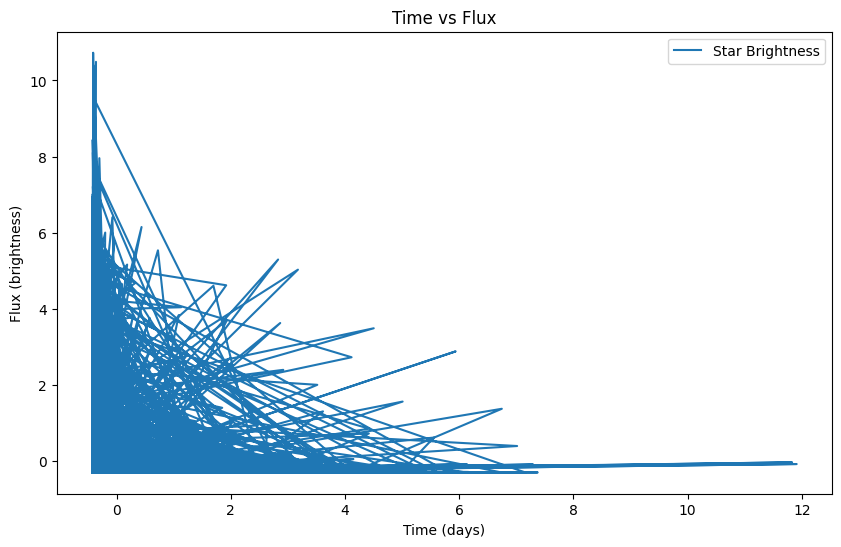

In [283]:
plt.figure(figsize = (10, 6))
plt.plot(data_features['koi_period'], data_features['koi_depth'], label = 'Star Brightness')
plt.title('Time vs Flux')
plt.xlabel('Time (days)')
plt.ylabel('Flux (brightness)')
plt.legend()
plt.show()

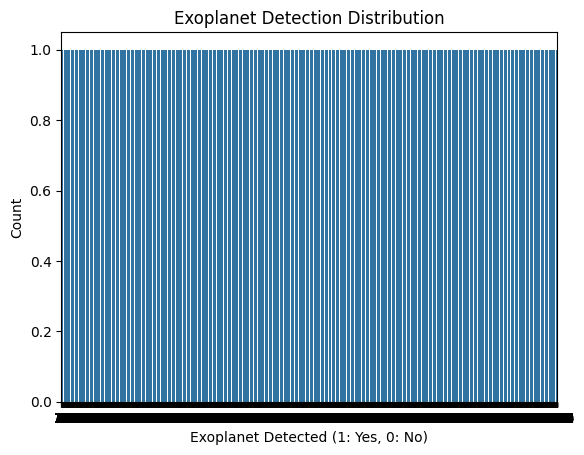

In [286]:
import seaborn as sns
sns.countplot(data_target['koi_pdisposition'])
plt.title('Exoplanet Detection Distribution')
plt.xlabel('Exoplanet Detected (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()